In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("test.csv")

In [3]:
data.shape

(549346, 2)

In [4]:
data.sample(10)

,URL,Label
151207,blogs.kqed.org/climatewatch/2011/08/09/natural...,good
304752,citibank.com/canada/homepage/english/contact.jsp,good
142707,answers.yahoo.com/question/index?qid=200710181...,good
78881,databases.about.com/od/foxpro/FoxPro_Programmi...,good
126899,pagebin.com/YTjwBR7F/,bad
117104,pagadiancomexpertech.com/File/Boss/,bad
444687,thefreelibrary.com/Fisher-Rosemount+and+Rogers...,good
368734,kiss108.com/main.html,good
388636,metromatinee.com/movies/index.php?FilmID=1947-...,good
234957,rhythmandblueshalfmarathon.com/,good


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [6]:
data.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [7]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [8]:
data.duplicated().sum()

42150

In [9]:
data.drop_duplicates(subset='URL', keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.rename(columns={'URL': 'url'})

In [10]:
data.shape

(507195, 2)

In [11]:
data.describe()

,url,Label
count,507195,507195
unique,507195,2
top,nobell.it/70ffb52d079109dca5664cce6f317373782/...,good
freq,1,392897


C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

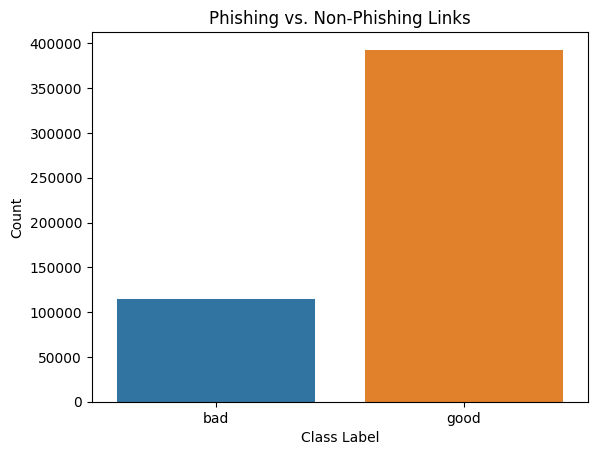

In [12]:
# Creating a countplot using seaborn
sns.countplot(x='Label', data=data)

# Adding labels and title
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Phishing vs. Non-Phishing Links')

# Displaying the chart
plt.show()


In [13]:
data0 = data[data['Label'] == "good"]
data1 = data[data['Label'] == "bad"]

In [14]:
data0.value_counts().sum()

392897

In [15]:
data1.value_counts().sum()

114298

In [16]:
legiurl = data0.sample(n = 5000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl = legiurl.drop(columns=["Label"])

In [17]:
legiurl.head()

,url
0,www.artima.com/intv/guido.html
1,canada.com/calgaryherald/news/calgarybusiness/...
2,shastacosportshof.org/northstate.htm
3,acapella.harmony-central.com/showthread.php?27...
4,models.com/models/Adriana-Lima/news


In [18]:
phishurl = data1.sample(n = 5000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl = phishurl.drop(columns=["Label"])

In [19]:
phishurl.head()

,url
0,158.255.226.168/js/
1,www.swifthawkstudios.com/~be/paypal/_webscr1.p...
2,herubaba.wapka.me/index.xhtml
3,elserviciodelvino.mx/tiendaserviciodelvino/che...
4,dwostasms.com/seta.apk


In [20]:
legiurl.to_csv('legiurl.csv', index= False)
phishurl.to_csv('phishurl.csv', index= False)